In [1]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp
# import folium
import json
# import pydeck as pdk
# import geopandas as gpd
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))
font_list_mac = fm.win32InstalledFonts()
print(len(font_list_mac))
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
# print(fm.fontManager.ttflist)
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

버전:  3.2.1
설치 위치:  C:\Users\KIMDOHWAN\Anaconda3\envs\dacon\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\KIMDOHWAN\.matplotlib
캐시 위치:  C:\Users\KIMDOHWAN\.matplotlib
설정 파일 위치:  C:\Users\KIMDOHWAN\Anaconda3\envs\dacon\lib\site-packages\matplotlib\mpl-data\matplotlibrc
717
358
717
Malgun Gothic


In [3]:
yp_df = pd.read_excel("../data/moving_population/ingu_hour_yeungdeungpo.xlsx",sheet_name=0)

In [4]:
mp_df = pd.read_excel("../data/moving_population/ingu_hour_mapo.xlsx",sheet_name=0)

In [15]:
ingu_var = [x for x in yp_df.columns if '_ingu' in x and len(x)>13]
print(len(ingu_var))
yp_df_2 = pd.melt(yp_df,['hour','latitude','longitude','gu_name','dong_name'],value_vars=ingu_var,var_name='성별연령대',value_name='인구')
yp_df_2.head()
yp_df_2['연령대'] = yp_df_2['성별연령대'].str.slice(stop=7)
yp_df_2['성별'] = yp_df_2['성별연령대'].str.slice(start=8)
yp_df_2 = yp_df_2.drop("성별연령대", axis=1)
yp_df_2['성별'] = yp_df_2.apply(lambda row:row['성별'].split('_')[0],axis=1)
yp_df_2.head()

18


,hour,latitude,longitude,gu_name,dong_name,인구,연령대,성별
0,0,37.510243,126.904651,영등포구,영등포본동,0.185763,under10,male
1,0,37.516164,126.917051,영등포구,영등포본동,0.112386,under10,male
2,0,37.512080,126.911425,영등포구,영등포본동,0.000000,under10,male
3,0,37.511581,126.901812,영등포구,영등포본동,0.417325,under10,male
4,0,37.514795,126.913667,영등포구,영등포본동,0.076697,under10,male


In [6]:
yp_df_2.groupby('dong_name')['latitude'].describe()

,count,mean,std,min,25%,50%,75%,max
dong_name,,,,,,,,
당산1동,128736.0,37.523915,0.002287,37.519236,37.521928,37.523744,37.525955,37.529119
당산2동,265320.0,37.533928,0.004710,37.526030,37.530034,37.533226,37.537741,37.544031
대림1동,86832.0,37.493676,0.002038,37.489070,37.492214,37.493588,37.495363,37.497191
대림2동,99360.0,37.489601,0.002182,37.485439,37.487713,37.489491,37.491287,37.494447
대림3동,160704.0,37.500029,0.003692,37.492621,37.497139,37.499851,37.502557,37.508383
도림동,101088.0,37.509134,0.001623,37.504353,37.507972,37.509314,37.510257,37.512071
문래동,310140.0,37.516519,0.002813,37.508830,37.514282,37.516532,37.518739,37.522736
신길1동,123552.0,37.512423,0.003080,37.505796,37.509868,37.512128,37.515268,37.518422
신길3동,91152.0,37.506210,0.001609,37.503009,37.504846,37.506173,37.507539,37.510271


In [16]:
mp_df_2 = pd.melt(mp_df,['hour','latitude','longitude','gu_name','dong_name'],value_vars=ingu_var,var_name='성별연령대',value_name='인구')
mp_df_2.head()
mp_df_2['연령대'] = mp_df_2['성별연령대'].str.slice(stop=7)
mp_df_2['성별'] = mp_df_2['성별연령대'].str.slice(start=8)
mp_df_2 = mp_df_2.drop("성별연령대", axis=1)
mp_df_2.head()
mp_df_2['성별'] = mp_df_2.apply(lambda row:row['성별'].split('_')[0],axis=1)
mp_df_2.head()

,hour,latitude,longitude,gu_name,dong_name,인구,연령대,성별
0,0,37.548776,126.951326,마포구,아현동,0.365343,under10,male
1,0,37.553301,126.955255,마포구,아현동,0.245545,under10,male
2,0,37.553755,126.955818,마포구,아현동,0.575684,under10,male
3,0,37.546512,126.949078,마포구,아현동,0.017785,under10,male
4,0,37.550584,126.952444,마포구,아현동,0.580266,under10,male


In [8]:
from branca.colormap import linear

colormap = linear.YlGn_09.scale(
    yp_df_2['인구'].min(),
    yp_df_2['인구'].max())
colormap

## 각 동별(row), 시간별(col), 성별(남/녀/전체) 인구 테이블

In [17]:
yp_groupby = yp_df_2[['hour','dong_name','성별','인구']].groupby(['hour','dong_name','성별'],as_index=False).sum()
mp_groupby = mp_df_2[['hour','dong_name','성별','인구']].groupby(['hour','dong_name','성별'],as_index=False).sum()


## 거주인구수를 가정한 유출입 인구가 필요한 이유

,hour,dong_name,성별,인구
0,0,당산1동,female,4960.996613
1,0,당산1동,male,5268.878628
2,0,당산2동,female,6869.698127
3,0,당산2동,male,6887.241337
4,0,대림1동,female,3485.915988
...,...,...,...,...
859,23,여의동,male,11562.278681
860,23,영등포동,female,8333.434325
861,23,영등포동,male,10232.950223
862,23,영등포본동,female,3675.359226


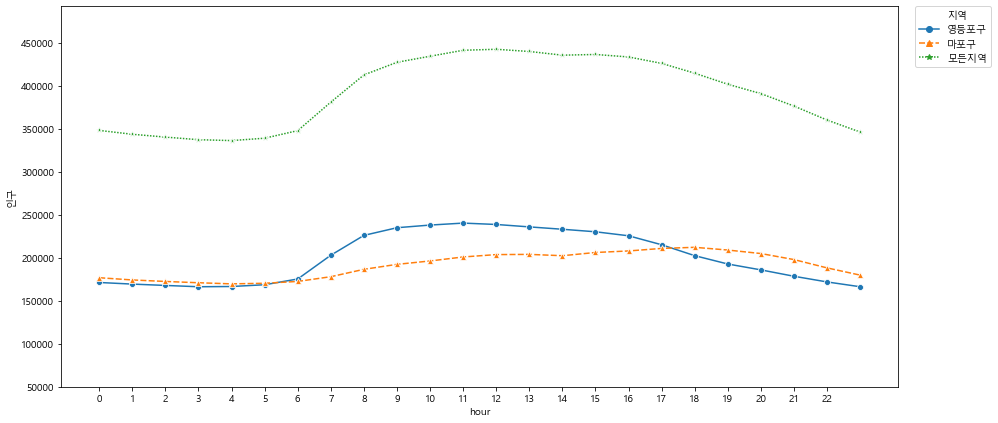

In [136]:
yp_data = yp_groupby.groupby('hour',as_index=False).sum()
mp_data = mp_groupby.groupby('hour',as_index=False).sum()
ypmp_data = yp_data.copy()
ypmp_data['영등포구'] = ypmp_data['인구']
ypmp_data['마포구'] = mp_data['인구']
ypmp_data['모든지역'] = mp_data['인구'] + ypmp_data['인구']
melted_ypmp_data = pd.melt(ypmp_data,'hour',value_vars=['영등포구','마포구','모든지역'],var_name='지역',value_name='인구')
melted_ypmp_data
plt.figure(figsize=(15,7))

g = sns.lineplot(data=melted_ypmp_data,x='hour',y='인구',hue='지역',style="지역", markers=["o","^","*"],err_style=None)
g.set_ylim(50000, melted_ypmp_data['인구'].max()+50000)

g = g.set(xticks= range(0,23,1))
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.)
yp_groupby

In [36]:
dong_gu_map ={x:'영등포구' for x in yp_groupby['dong_name'].unique()}
dong_gu_map.update({y:'마포구' for y in mp_groupby['dong_name'].unique()})
dong_gu_map

{'당산1동': '영등포구',
 '당산2동': '영등포구',
 '대림1동': '영등포구',
 '대림2동': '영등포구',
 '대림3동': '영등포구',
 '도림동': '영등포구',
 '문래동': '영등포구',
 '신길1동': '영등포구',
 '신길3동': '영등포구',
 '신길4동': '영등포구',
 '신길5동': '영등포구',
 '신길6동': '영등포구',
 '신길7동': '영등포구',
 '양평1동': '영등포구',
 '양평2동': '영등포구',
 '여의동': '영등포구',
 '영등포동': '영등포구',
 '영등포본동': '영등포구',
 '공덕동': '마포구',
 '대흥동': '마포구',
 '도화동': '마포구',
 '망원1동': '마포구',
 '망원2동': '마포구',
 '상암동': '마포구',
 '서강동': '마포구',
 '서교동': '마포구',
 '성산1동': '마포구',
 '성산2동': '마포구',
 '신수동': '마포구',
 '아현동': '마포구',
 '연남동': '마포구',
 '염리동': '마포구',
 '용강동': '마포구',
 '합정동': '마포구'}

## 여의도, 마포구 데이터 이어주기 (concat)

In [24]:
ypmp_groupby = pd.concat([yp_groupby,mp_groupby])

### concat후 index reset (sorting을 안해주고 차이를 구하니 index가 달라 원하는 값을 얻지 못했다. 그래서 sorting 부분을 추가)

In [25]:
ypmp_groupby = ypmp_groupby.sort_values(by=['hour','dong_name','성별'])
ypmp_groupby['index'] = range(ypmp_groupby.shape[0])
ypmp_groupby = ypmp_groupby.set_index('index')
ypmp_groupby = ypmp_groupby.rename(columns={'dong_name':'dong'})
ypmp_groupby

,hour,dong,성별,인구
index,,,,
0,0,공덕동,female,8359.776753
1,0,공덕동,male,7549.914763
2,0,당산1동,female,4960.996613
3,0,당산1동,male,5268.878628
4,0,당산2동,female,6869.698127
...,...,...,...,...
1627,23,영등포본동,male,3949.204927
1628,23,용강동,female,4466.298791
1629,23,용강동,male,4513.142324


## 유동 인구 테이블로 변환

### 거주 인구 데이터 불러오기 --> skt 통신 데이터 수와 일치하지 않아 폐기

In [11]:
enrolled_ingu = pd.read_csv('서울시 주민등록인구 (동별) 통계.txt', sep="\t", header=2)
target_enrolled_ingu = enrolled_ingu[(enrolled_ingu['자치구']=='마포구') | (enrolled_ingu['자치구']=='영등포구')]
target_enrolled_ingu = target_enrolled_ingu[['행정동','계','남자','여자']]
target_enrolled_ingu.head()

,행정동,계,남자,여자
220,소계,"385,925","181,303","204,622"
221,용강동,"22,441","10,655","11,786"
222,대흥동,"13,575","6,196","7,379"
223,염리동,"13,486","6,338","7,148"
224,신수동,"23,877","11,605","12,272"


### 유동 인구 테이블로 변환 (새벽 3시 각 동별, 성별 인구와의 차를 유동인구로 정의)

In [26]:
move_ypmp_groupby = ypmp_groupby.copy()
for _hour in range(24):
    diff = np.array(move_ypmp_groupby[move_ypmp_groupby['hour']==_hour]['인구']) - np.array(move_ypmp_groupby[move_ypmp_groupby['hour']==3]['인구'])
    length = len(diff)
    move_ypmp_groupby.iloc[_hour*length:(_hour+1)*length,3] = diff
move_ypmp_groupby.to_csv('ypmp_hour_dong_sex_ingu.csv')

In [27]:
move_ypmp_groupby.iloc[3*length:(3+1)*length,:].head()

,hour,dong,성별,인구
index,,,,
204,3,공덕동,female,0.0
205,3,공덕동,male,0.0
206,3,당산1동,female,0.0
207,3,당산1동,male,0.0
208,3,당산2동,female,0.0


### 각 동별(row), 시간별(col), 성별(남/녀/전체) 인구 테이블

In [28]:
move_ypmp_groupby[(move_ypmp_groupby['dong']=='공덕동')&(move_ypmp_groupby['hour']==0)]

,hour,dong,성별,인구
index,,,,
0,0,공덕동,female,34.297368
1,0,공덕동,male,136.018577


In [29]:
total_move_groupby = move_ypmp_groupby.groupby(['hour','dong'],as_index=False,sort=False).sum()
total_move_groupby.head()

,hour,dong,인구
0,0,공덕동,170.315945
1,0,당산1동,404.258111
2,0,당산2동,665.381161
3,0,대림1동,-51.322060
4,0,대림2동,65.283159


### 각 동별(row), 시간별(col), 성별(남/녀/전체/남녀성비율) 인구 테이블

In [30]:
total_move_groupby['여성'] = np.array(move_ypmp_groupby[move_ypmp_groupby['성별']=='female']['인구'])
total_move_groupby['남성'] = np.array(move_ypmp_groupby[move_ypmp_groupby['성별']=='male']['인구'])
total_move_groupby['남성비율'] = np.abs(np.array(move_ypmp_groupby[move_ypmp_groupby['성별']=='male']['인구']))/(np.abs(np.array(move_ypmp_groupby[move_ypmp_groupby['성별']=='female']['인구']))+np.abs(np.array(move_ypmp_groupby[move_ypmp_groupby['성별']=='male']['인구'])))

C:\Users\KIMDOHWAN\Anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
# total_move_groupby['dong'] = total_move_groupby['dong_name']
# del total_move_groupby['dong_name']
total_move_groupby.head()

,hour,dong,인구,여성,남성,남성비율
0,0,공덕동,170.315945,34.297368,136.018577,0.798625
1,0,당산1동,404.258111,114.540847,289.717264,0.716664
2,0,당산2동,665.381161,203.303645,462.077516,0.694455
3,0,대림1동,-51.322060,-7.363765,-43.958295,0.856519
4,0,대림2동,65.283159,17.826607,47.456551,0.726934


### 남성비율이 새벽 3시에 NAN으로 처리됨, 해당 비율은 원래 3시에 있던 인구들의 성비율로 대체

In [32]:
# total_move_groupby[total_move_groupby['hour']==3]
female = np.array(ypmp_groupby[(ypmp_groupby['hour']==3)&(ypmp_groupby['성별']=='female')]['인구'])
male = np.array(ypmp_groupby[(ypmp_groupby['hour']==3)&(ypmp_groupby['성별']=='male')]['인구'])
# ypmp_groupby[(ypmp_groupby['hour']==3)&(ypmp_groupby['성별']=='female')]
# ypmp_groupby[(ypmp_groupby['hour']==3)&(ypmp_groupby['성별']=='male')]
total_move_groupby.iloc[len(female)*3:len(female)*4,5] = male / (female + male)
total_move_groupby.iloc[len(female)*3:len(female)*4].head()

,hour,dong,인구,여성,남성,남성비율
102,3,공덕동,0.0,0.0,0.0,0.471041
103,3,당산1동,0.0,0.0,0.0,0.506753
104,3,당산2동,0.0,0.0,0.0,0.490787
105,3,대림1동,0.0,0.0,0.0,0.499187
106,3,대림2동,0.0,0.0,0.0,0.492161


In [33]:
total_move_groupby[total_move_groupby['남성비율'].isnull()]

,hour,dong,인구,여성,남성,남성비율


In [34]:
total_move_groupby.head()
total_move_groupby.to_csv('ypmp_hour_dong_sexratio_ingu.csv')

## 0시~2시 인구를 뒤에 삽입하기

In [73]:
data_3_to_23 = total_move_groupby[total_move_groupby['hour']>=3]
data_0_to_2 = total_move_groupby[total_move_groupby['hour']<3]
data_0_to_2.loc[:,'hour'] = data_0_to_2.apply(lambda row:row['hour']+24,axis=1)
data_3_to_26 = pd.concat([data_3_to_23,data_0_to_2])

data_3_to_26['index'] = range(data_3_to_26.shape[0])
data_3_to_26 = data_3_to_26.set_index('index')

data_3_to_26

C:\Users\KIMDOHWAN\Anaconda3\envs\dacon\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,hour,dong,인구,여성,남성,남성비율,abs인구
index,,,,,,,
0,3,공덕동,0.000000,0.000000,0.000000,0.471041,0.000000
1,3,당산1동,0.000000,0.000000,0.000000,0.506753,0.000000
2,3,당산2동,0.000000,0.000000,0.000000,0.490787,0.000000
3,3,대림1동,0.000000,0.000000,0.000000,0.499187,0.000000
4,3,대림2동,0.000000,0.000000,0.000000,0.492161,0.000000
...,...,...,...,...,...,...,...
811,26,염리동,-14.482473,3.342557,-17.825029,0.842091,14.482473
812,26,영등포동,241.349289,82.167216,159.182073,0.659551,241.349289
813,26,영등포본동,70.967422,26.254296,44.713126,0.630051,70.967422


## 유동 인구가 많은 동 top5 선택

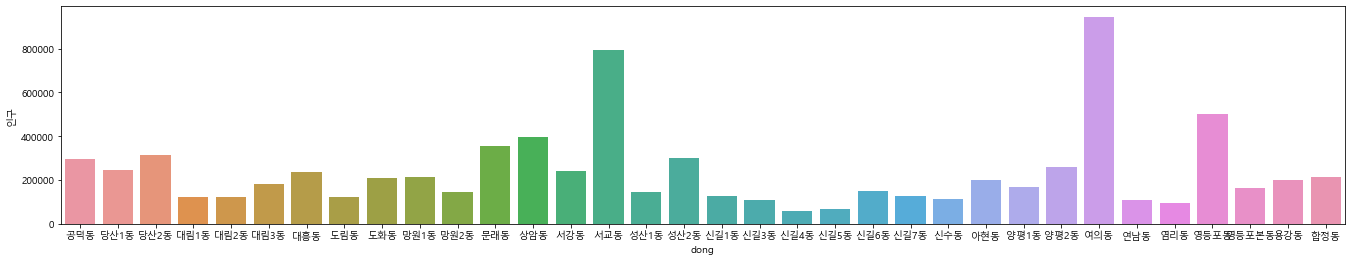

In [57]:
total_move_groupby['abs인구'] = total_move_groupby.apply(lambda row:np.abs(row['인구']),axis=1)
abs_move_groupby = total_move_groupby.groupby('dong',as_index=False).sum()#.nlargest(10, 'abs인구')
plt.figure(figsize=(23,4))
sns.barplot(data=abs_move_groupby,x='dong',y='인구')

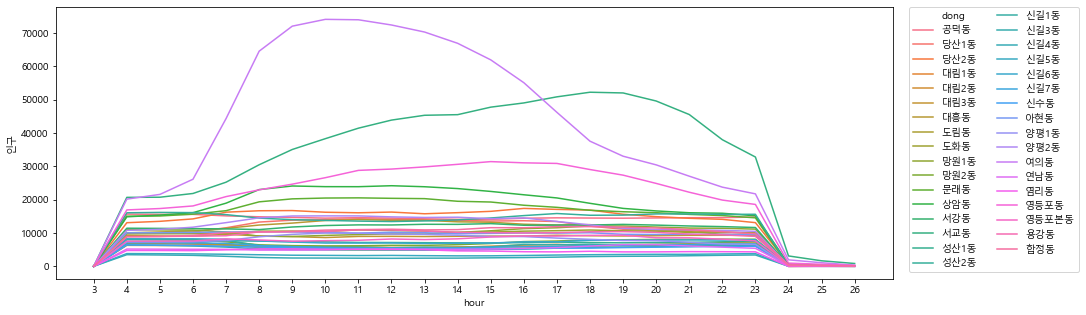

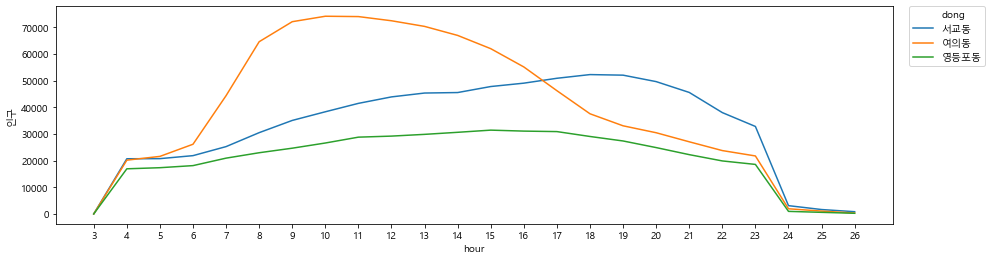

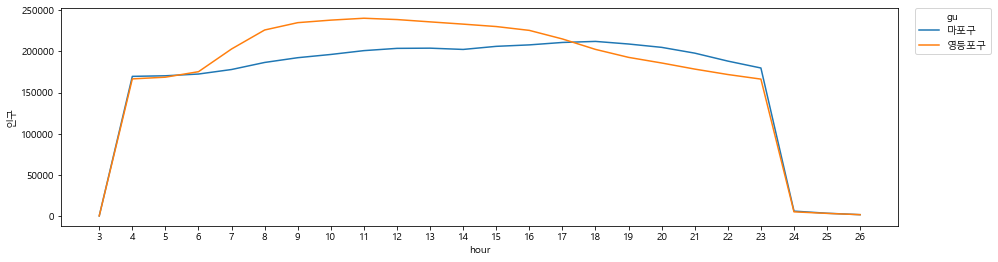

In [94]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(data=data_3_to_26,x='hour',y='인구',hue='dong',sort=False)
ax.set_xticks(range(3,27,1))
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0., ncol=2)

select_move_groupby = data_3_to_26[(data_3_to_26['dong']=='여의동')
                                         |(data_3_to_26['dong']=='서교동')
                                         |(data_3_to_26['dong']=='영등포동')]
plt.figure(figsize=(15,4))
ax = sns.lineplot(data=select_move_groupby,x='hour',y='인구',hue='dong',sort=False)
ax.set_xticks(range(3,27,1))
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.)

gu_add_move_groupby = data_3_to_26.copy()
gu_add_move_groupby['gu'] = data_3_to_26.apply(lambda row:dong_gu_map[row['dong']],axis=1)
gu_groupby = gu_add_move_groupby.groupby(['hour','gu'],as_index=False,sort=False).sum()
gu_groupby
plt.figure(figsize=(15,4))
ax = sns.lineplot(data=gu_groupby,x='hour',y='인구',hue='gu',sort=False)
ax.set_xticks(range(3,27,1))
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.)

## relplot으로 (서교동vs여의동 인구차이, 남성인구차이, 여성인구차이) 3가지를 보여주고자 함

In [93]:
select_move_groupby = data_3_to_26[(data_3_to_26['dong']=='여의동')
                                         |(data_3_to_26['dong']=='서교동')]
select_move_groupby 
melted_select_move_groupby = pd.melt(select_move_groupby,['hour','dong'],value_vars=['인구','여성','남성'],var_name='성별',value_name='인구')
melted_select_move_groupby[melted_select_move_groupby['hour']==14]
melted_select_move_groupby['성별'] = melted_select_move_groupby.apply(lambda row:'전체' if row['성별']=='인구' else row['성별'],axis=1)
melted_select_move_groupby

,hour,dong,성별,인구
0,3,서교동,전체,0.000000
1,3,여의동,전체,0.000000
2,4,서교동,전체,20690.101671
3,4,여의동,전체,20162.580797
4,5,서교동,전체,20731.181732
...,...,...,...,...
139,24,여의동,남성,1318.163071
140,25,서교동,남성,1126.470401
141,25,여의동,남성,719.456945
142,26,서교동,남성,609.739280


No handles with labels found to put in legend.


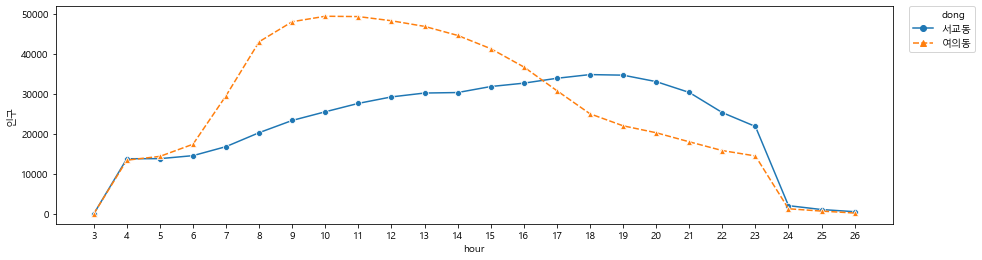

<Figure size 1080x288 with 0 Axes>

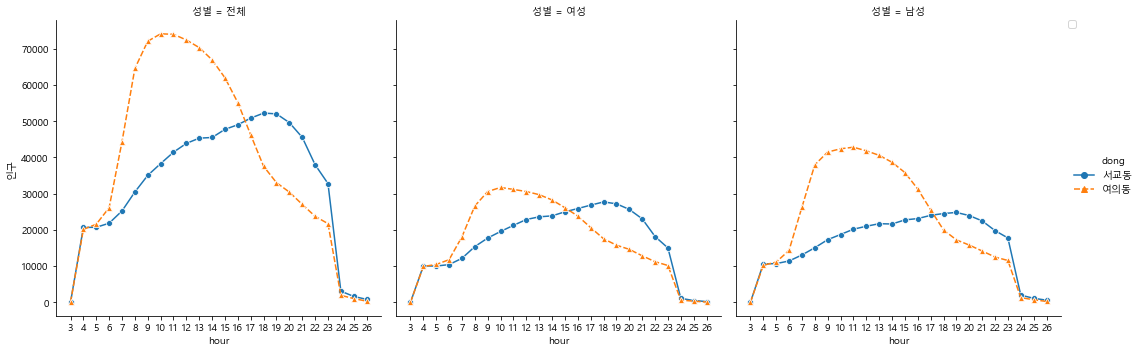

In [114]:
plt.figure(figsize=(15,4))
g = sns.lineplot(data=melted_select_move_groupby,x='hour',y='인구',hue='dong',style="dong", markers=["o","^"],err_style=None)
g = g.set(xticks= range(3,27,1))
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.)

plt.figure(figsize=(15,4))
g = sns.relplot(data=melted_select_move_groupby,x='hour',y='인구',kind='line',hue='dong',col='성별',style="dong", markers=["o","^"],err_style=None)
g = g.set(xticks= range(3,27,1))
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.)

## 각 동별(row), 특정 시간의 남/녀/전체(col) 인구 테이블

## 각 동별(row), 특정 시간대의 남/녀/전체(col) 인구 테이블

In [21]:
geo_path = 'geodata/seoul_yp_mp_map.geojson'
geo_str = json.load(open(geo_path, encoding='utf-8'))
# geo_str

In [22]:
df = gpd.read_file(geo_path)

In [23]:
def multipolygon_to_coordinates(x):
    lon, lat = x[0].exterior.xy
    return [[x, y] for x, y in zip(lon, lat)]

df['coordinates'] = df['geometry'].apply(multipolygon_to_coordinates)
del df['geometry']


In [24]:
select_geometry = df[['dong','coordinates']]
select_geometry.head()

,dong,coordinates
0,용강동,"[[126.9445281888074, 37.54514799989514], [126...."
1,대흥동,"[[126.94681220459611, 37.5568494513366], [126...."
2,염리동,"[[126.94968160411595, 37.54381892668303], [126..."
3,신수동,"[[126.94073140875314, 37.546613890545075], [12..."
4,서교동,"[[126.91353477929526, 37.54948323708437], [126..."


In [25]:
merged_move_ingu = pd.merge(total_move_groupby,select_geometry,on='dong')
# merged_move_ingu[(merged_move_ingu['dong']=='공덕동')]

## 가시화를 위해 인구 정규화

In [26]:
merged_move_ingu['정규화인구'] = merged_move_ingu['인구'] / merged_move_ingu['인구'].max()
merged_move_ingu
samlple_test_ingu = merged_move_ingu[(merged_move_ingu['hour']<7)]
samlple_test_ingu['시간별정규화인구'] = samlple_test_ingu['인구'] / samlple_test_ingu['인구'].max()
samlple_test_ingu.head()

c:\project\venv\dacon\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,hour,dong,인구,여성,남성,남성비율,coordinates,정규화인구,시간별정규화인구
0,0,공덕동,170.315945,34.297368,136.018577,0.798625,"[[126.96238687439413, 37.551503993982486], [12...",0.002297,0.006517
1,1,공덕동,68.601832,-6.065312,74.667144,0.924871,"[[126.96238687439413, 37.551503993982486], [12...",0.000925,0.002625
2,2,공덕동,96.101433,28.955433,67.146000,0.698699,"[[126.96238687439413, 37.551503993982486], [12...",0.001296,0.003677
3,3,공덕동,0.000000,0.000000,0.000000,0.471041,"[[126.96238687439413, 37.551503993982486], [12...",0.000000,0.000000
4,4,공덕동,15660.061730,8239.171461,7420.890268,0.473874,"[[126.96238687439413, 37.551503993982486], [12...",0.211214,0.599211


In [27]:
samlple_test_ingu2 = merged_move_ingu[(merged_move_ingu['hour']>=7)&(merged_move_ingu['hour']<11)]
samlple_test_ingu2['시간별정규화인구'] = samlple_test_ingu2['인구'] / samlple_test_ingu2['인구'].max()
samlple_test_ingu2.head()

c:\project\venv\dacon\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hour,dong,인구,여성,남성,남성비율,coordinates,정규화인구,시간별정규화인구
7,7,공덕동,15130.336707,7904.714363,7225.622343,0.477559,"[[126.96238687439413, 37.551503993982486], [12...",0.204069,0.204069
8,8,공덕동,14857.823897,7890.408341,6967.415555,0.468939,"[[126.96238687439413, 37.551503993982486], [12...",0.200394,0.200394
9,9,공덕동,14669.436699,7768.340972,6901.095727,0.470440,"[[126.96238687439413, 37.551503993982486], [12...",0.197853,0.197853
10,10,공덕동,14453.705606,7706.655926,6747.049681,0.466804,"[[126.96238687439413, 37.551503993982486], [12...",0.194943,0.194943
31,7,당산1동,11553.069565,5668.851560,5884.218005,0.509321,"[[126.90283572959682, 37.52612206788627], [126...",0.155821,0.155821


In [28]:
samlple_test_ingu3 = merged_move_ingu[(merged_move_ingu['hour']>=11)&(merged_move_ingu['hour']<17)]
samlple_test_ingu3['시간별정규화인구'] = samlple_test_ingu3['인구'] / samlple_test_ingu3['인구'].max()
samlple_test_ingu3.head()

c:\project\venv\dacon\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hour,dong,인구,여성,남성,남성비율,coordinates,정규화인구,시간별정규화인구
11,11,공덕동,14585.685457,7733.580539,6852.104918,0.469783,"[[126.96238687439413, 37.551503993982486], [12...",0.196723,0.197062
12,12,공덕동,14460.573140,7662.709733,6797.863406,0.470096,"[[126.96238687439413, 37.551503993982486], [12...",0.195036,0.195372
13,13,공덕동,14257.774788,7585.232723,6672.542066,0.467993,"[[126.96238687439413, 37.551503993982486], [12...",0.192300,0.192632
14,14,공덕동,14087.225632,7469.283939,6617.941693,0.469783,"[[126.96238687439413, 37.551503993982486], [12...",0.190000,0.190327
15,15,공덕동,14089.962750,7420.615256,6669.347494,0.473340,"[[126.96238687439413, 37.551503993982486], [12...",0.190037,0.190364


In [29]:
samlple_test_ingu4 = merged_move_ingu[(merged_move_ingu['hour']>=17)&(merged_move_ingu['hour']<20)]
samlple_test_ingu4['시간별정규화인구'] = samlple_test_ingu4['인구'] / samlple_test_ingu4['인구'].max()
samlple_test_ingu4.head()

c:\project\venv\dacon\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hour,dong,인구,여성,남성,남성비율,coordinates,정규화인구,시간별정규화인구
17,17,공덕동,14543.037579,7508.701141,7034.336437,0.483691,"[[126.96238687439413, 37.551503993982486], [12...",0.196148,0.278280
18,18,공덕동,14477.569915,7364.923910,7112.646005,0.491287,"[[126.96238687439413, 37.551503993982486], [12...",0.195265,0.277027
19,19,공덕동,14430.436719,7331.474534,7098.962184,0.491944,"[[126.96238687439413, 37.551503993982486], [12...",0.194629,0.276126
41,17,당산1동,13430.404590,6529.918304,6900.486285,0.513796,"[[126.90283572959682, 37.52612206788627], [126...",0.181141,0.256990
42,18,당산1동,12055.610720,5602.020949,6453.589771,0.535318,"[[126.90283572959682, 37.52612206788627], [126...",0.162599,0.230683


In [30]:
samlple_test_ingu5 = merged_move_ingu[(merged_move_ingu['hour']>=20)&(merged_move_ingu['hour']<24)]
samlple_test_ingu5['시간별정규화인구'] = samlple_test_ingu5['인구'] / samlple_test_ingu5['인구'].max()
samlple_test_ingu5.head()

c:\project\venv\dacon\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hour,dong,인구,여성,남성,남성비율,coordinates,정규화인구,시간별정규화인구
20,20,공덕동,14512.071719,7380.623322,7131.448398,0.491415,"[[126.96238687439413, 37.551503993982486], [12...",0.195730,0.292435
21,21,공덕동,14575.892497,7428.246684,7147.645814,0.490374,"[[126.96238687439413, 37.551503993982486], [12...",0.196591,0.293721
22,22,공덕동,14606.126609,7501.055986,7105.070623,0.486445,"[[126.96238687439413, 37.551503993982486], [12...",0.196999,0.294331
23,23,공덕동,14787.487700,7645.412500,7142.075200,0.482981,"[[126.96238687439413, 37.551503993982486], [12...",0.199445,0.297985
44,20,당산1동,10704.253914,5070.864248,5633.389666,0.526276,"[[126.90283572959682, 37.52612206788627], [126...",0.144373,0.215703


In [35]:
merged_move_ingu[merged_move_ingu['hour']==0]

,hour,dong,인구,여성,남성,남성비율,coordinates,정규화인구
0,0,공덕동,170.315945,34.297368,136.018577,0.798625,"[[126.96238687439413, 37.551503993982486], [12...",0.002297
24,0,당산1동,404.258111,114.540847,289.717264,0.716664,"[[126.90283572959682, 37.52612206788627], [126...",0.005452
48,0,당산2동,665.381161,203.303645,462.077516,0.694455,"[[126.90771292525608, 37.54166765894863], [126...",0.008974
72,0,대림1동,-51.322060,-7.363765,-43.958295,0.856519,"[[126.90945108485955, 37.49258677822098], [126...",-0.000692
96,0,대림2동,65.283159,17.826607,47.456551,0.726934,"[[126.90633045911946, 37.488926320200605], [12...",0.000881
120,0,대림3동,150.597540,43.761355,106.836185,0.709415,"[[126.89821902246794, 37.50533375222877], [126...",0.002031
144,0,대흥동,64.841585,11.518665,53.322921,0.822357,"[[126.94681220459611, 37.5568494513366], [126....",0.000875
168,0,도림동,-12.517122,2.839968,-15.357090,0.843933,"[[126.91029490131251, 37.51070588023117], [126...",-0.000169
192,0,도화동,354.089502,103.350687,250.738815,0.708123,"[[126.95640090853102, 37.540584973834626], [12...",0.004776
216,0,망원1동,158.447700,33.704531,124.743168,0.787283,"[[126.90879758955973, 37.55741869164588], [126...",0.002137


In [115]:
merged_move_ingu['여성비율'] = 1 -  merged_move_ingu['남성비율']
merged_move_ingu['여성상대비율'] = merged_move_ingu.apply(lambda row:0 if row['남성비율']>=0.5 else row['여성비율'],axis=1) 
merged_move_ingu['남성상대비율'] = merged_move_ingu.apply(lambda row:0 if row['여성비율']>=0.5 else row['남성비율'],axis=1) 
merged_move_ingu

,hour,dong,인구,여성,남성,남성비율,coordinates,정규화인구,여성비율,여성상대비율,남성상대비율
0,0,공덕동,170.315945,34.297368,136.018577,0.798625,"[[126.96238687439413, 37.551503993982486], [12...",0.002297,0.201375,0.000000,0.798625
1,1,공덕동,68.601832,-6.065312,74.667144,0.924871,"[[126.96238687439413, 37.551503993982486], [12...",0.000925,0.075129,0.000000,0.924871
2,2,공덕동,96.101433,28.955433,67.146000,0.698699,"[[126.96238687439413, 37.551503993982486], [12...",0.001296,0.301301,0.000000,0.698699
3,3,공덕동,0.000000,0.000000,0.000000,0.471041,"[[126.96238687439413, 37.551503993982486], [12...",0.000000,0.528959,0.528959,0.000000
4,4,공덕동,15660.061730,8239.171461,7420.890268,0.473874,"[[126.96238687439413, 37.551503993982486], [12...",0.211214,0.526126,0.526126,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
811,19,합정동,11730.859870,5954.384096,5776.475774,0.492417,"[[126.91353477929526, 37.54948323708437], [126...",0.158219,0.507583,0.507583,0.000000
812,20,합정동,11493.901346,5835.635424,5658.265922,0.492284,"[[126.91353477929526, 37.54948323708437], [126...",0.155023,0.507716,0.507716,0.000000
813,21,합정동,11000.648148,5571.030733,5429.617414,0.493573,"[[126.91353477929526, 37.54948323708437], [126...",0.148370,0.506427,0.506427,0.000000
814,22,합정동,10419.194993,5177.774937,5241.420055,0.503054,"[[126.91353477929526, 37.54948323708437], [126...",0.140528,0.496946,0.000000,0.503054


In [95]:
# Make layer 
layer = pdk.Layer( 'PolygonLayer', # 사용할 Layer 타입
                  merged_move_ingu, # 시각화에 쓰일 데이터프레임
                  get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
                  get_fill_color='[0, 255*정규화인구, 0]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
                  pickable=True, # 지도와 interactive 한 동작 on 
                  auto_highlight=True, # 마우스 오버(hover) 시 박스 출력 
                  getElevation='인구',
                  elevation_scale=0.1,
#                   elevation_range=[merged_move_ingu['인구'].min(), merged_move_ingu['인구'].max()],
                  extruded=True
                 ) 

# geojson = pydeck.Layer(
#     'GeoJsonLayer',
#     merged_move_ingu,
#     opacity=0.8,
#     stroked=False,
#     filled=True,
#     extruded=True,
#     wireframe=True,
#     get_elevation='properties.valuePerSqm / 20',
#     get_fill_color='[255, 255, properties.growth * 255]',
#     get_line_color=[255, 255, 255],
#     pickable=True
# )
# Set the viewport location 
center = [126.986, 37.565] 
view_state = pdk.ViewState( longitude=center[0], latitude=center[1], zoom=10)
view_state.bearing=15
view_state.pitch=70

# Render 
r = pdk.Deck(layers=[layer], 
             initial_view_state=view_state,
             tooltip=True
            ) 
r.to_html('merged_move_ingu.html')

import ipywidgets as widgets
from IPython.display import display
slider = widgets.IntSlider(6, min=0, max=23, step=1)

# Widget에서 사용할 함수 정의 
def on_change(v):
    results = merged_move_ingu[merged_move_ingu['hour'] == slider.value].to_dict(orient='records')
    layer.data = results
    r.update()

  # Deck과 슬라이더 연결
slider.observe(on_change, names='value')
display(slider)

IntSlider(value=6, max=23)

In [96]:
r.show()

DeckGLWidget(json_input='{"initialViewState": {"bearing": 15, "latitude": 37.565, "longitude": 126.986, "pitch…

In [140]:
# Make layer 

layer2 = pdk.Layer( 'PolygonLayer', # 사용할 Layer 타입
                  merged_move_ingu, # 시각화에 쓰일 데이터프레임
                  get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
                  get_fill_color='[255*여성상대비율, 40, 255*남성상대비율,228]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
                  pickable=True, # 지도와 interactive 한 동작 on 
                  auto_highlight=True, # 마우스 오버(hover) 시 박스 출력 
                  getElevation='인구',
                  elevation_scale=0.05,
                  extruded=True
                 ) 

# Set the viewport location 
center = [126.986, 37.565] 
view_state = pdk.ViewState( longitude=center[0], latitude=center[1], zoom=10)
view_state.bearing=15
view_state.pitch=70

# Render 
r2 = pdk.Deck(layers=[layer2], 
             initial_view_state=view_state,
             ) 
# r2.to_html('merged_move_ingu_wrt_sex.html')

import ipywidgets as widgets
from IPython.display import display
slider2 = widgets.IntSlider(6, min=0, max=23, step=1)

# Widget에서 사용할 함수 정의 
def on_change(v):
    results = merged_move_ingu[merged_move_ingu['hour'] == slider2.value].to_dict(orient='records')
    layer2.data = results
    r2.update()

  # Deck과 슬라이더 연결
slider2.observe(on_change, names='value')
display(slider2)

IntSlider(value=6, max=23)

In [141]:
r2.show()

DeckGLWidget(json_input='{"initialViewState": {"bearing": 15, "latitude": 37.565, "longitude": 126.986, "pitch…

## 각 동별 인구수 데이터가 필요 (동별, 시간대별, 성별)

## 두번째로는 동별, 연령대별 인구도

In [47]:
# Make layer 
layer = pdk.Layer( 'HexagonLayer', # 사용할 Layer 타입
                  merged_move_ingu, # 시각화에 쓰일 데이터프레임
                  get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
                  get_fill_color='[0, 255*정규화인구, 0]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
                  pickable=True, # 지도와 interactive 한 동작 on 
                  auto_highlight=True # 마우스 오버(hover) 시 박스 출력 
                 ) 

layer.extruded = True;
layer.get_elevation = '인구';
layer.elevation_scale = 1
# layer.elevation_range=[merged_move_ingu['인구'].min, merged_move_ingu['인구'].max]
# view_state.bearing=15
# view_state.pitch=45

# Set the viewport location 
center = [126.986, 37.565] 
view_state = pdk.ViewState( longitude=center[0], latitude=center[1], zoom=10)

# Render 
r = pdk.Deck(layers=[layer], initial_view_state=view_state) 
r.to_html('merged_move_ingu.html')

import ipywidgets as widgets
from IPython.display import display
slider = widgets.IntSlider(6, min=0, max=23, step=1)

# Widget에서 사용할 함수 정의 
def on_change(v):
    results = merged_move_ingu[merged_move_ingu['hour'] == slider.value].to_dict(orient='records')
    layer.data = results
    r.update()

  # Deck과 슬라이더 연결
slider.observe(on_change, names='value')
display(slider)
r.show()

IntSlider(value=6, max=23)

DeckGLWidget(json_input='{"initialViewState": {"latitude": 37.565, "longitude": 126.986, "zoom": 10}, "layers"…